# Solar Composition Profiles

Figure 6.4 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of solar composition profiles.
 * Left: hydrogen (X) and <sup>4</sup>He (Y) mass fractions as function of radius
 * Right: mean molecular weight as function of radius
 
Uses the Bahcall & Pinsonneault 2004 standard solar model (BP04) calculations.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_4.png' 

# graphic aspect ratio = width/height

aspect = 2.4

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## BP04 Standard Solar Model composition data

We plot 4 columns from `BP2004_Composition.txt` which is in the `ModelSun/` folder:
 * Radius - r/Rsun
 * X - hydrogen mass fraction
 * Y - <sup>4</sup>He mass fraction
 * mu - mean molecular mass


In [3]:
bp04File = 'ModelSun/BP2004_Composition.txt'

data = pd.read_csv(bp04File,sep=r'\s+',comment='#')
R = np.array(data['Radius'])
X = np.array(data['X'])
Y = np.array(data['Y'])
mu = np.array(data['mu'])

## Figure 6.4

Two-panel side-by-side plot.
 * Left: X and Y vs R/R<sub>sun</sub>
 * Right: $\mu$=m/m<sub>p</sub> vs R/R<sub>sun</sub>

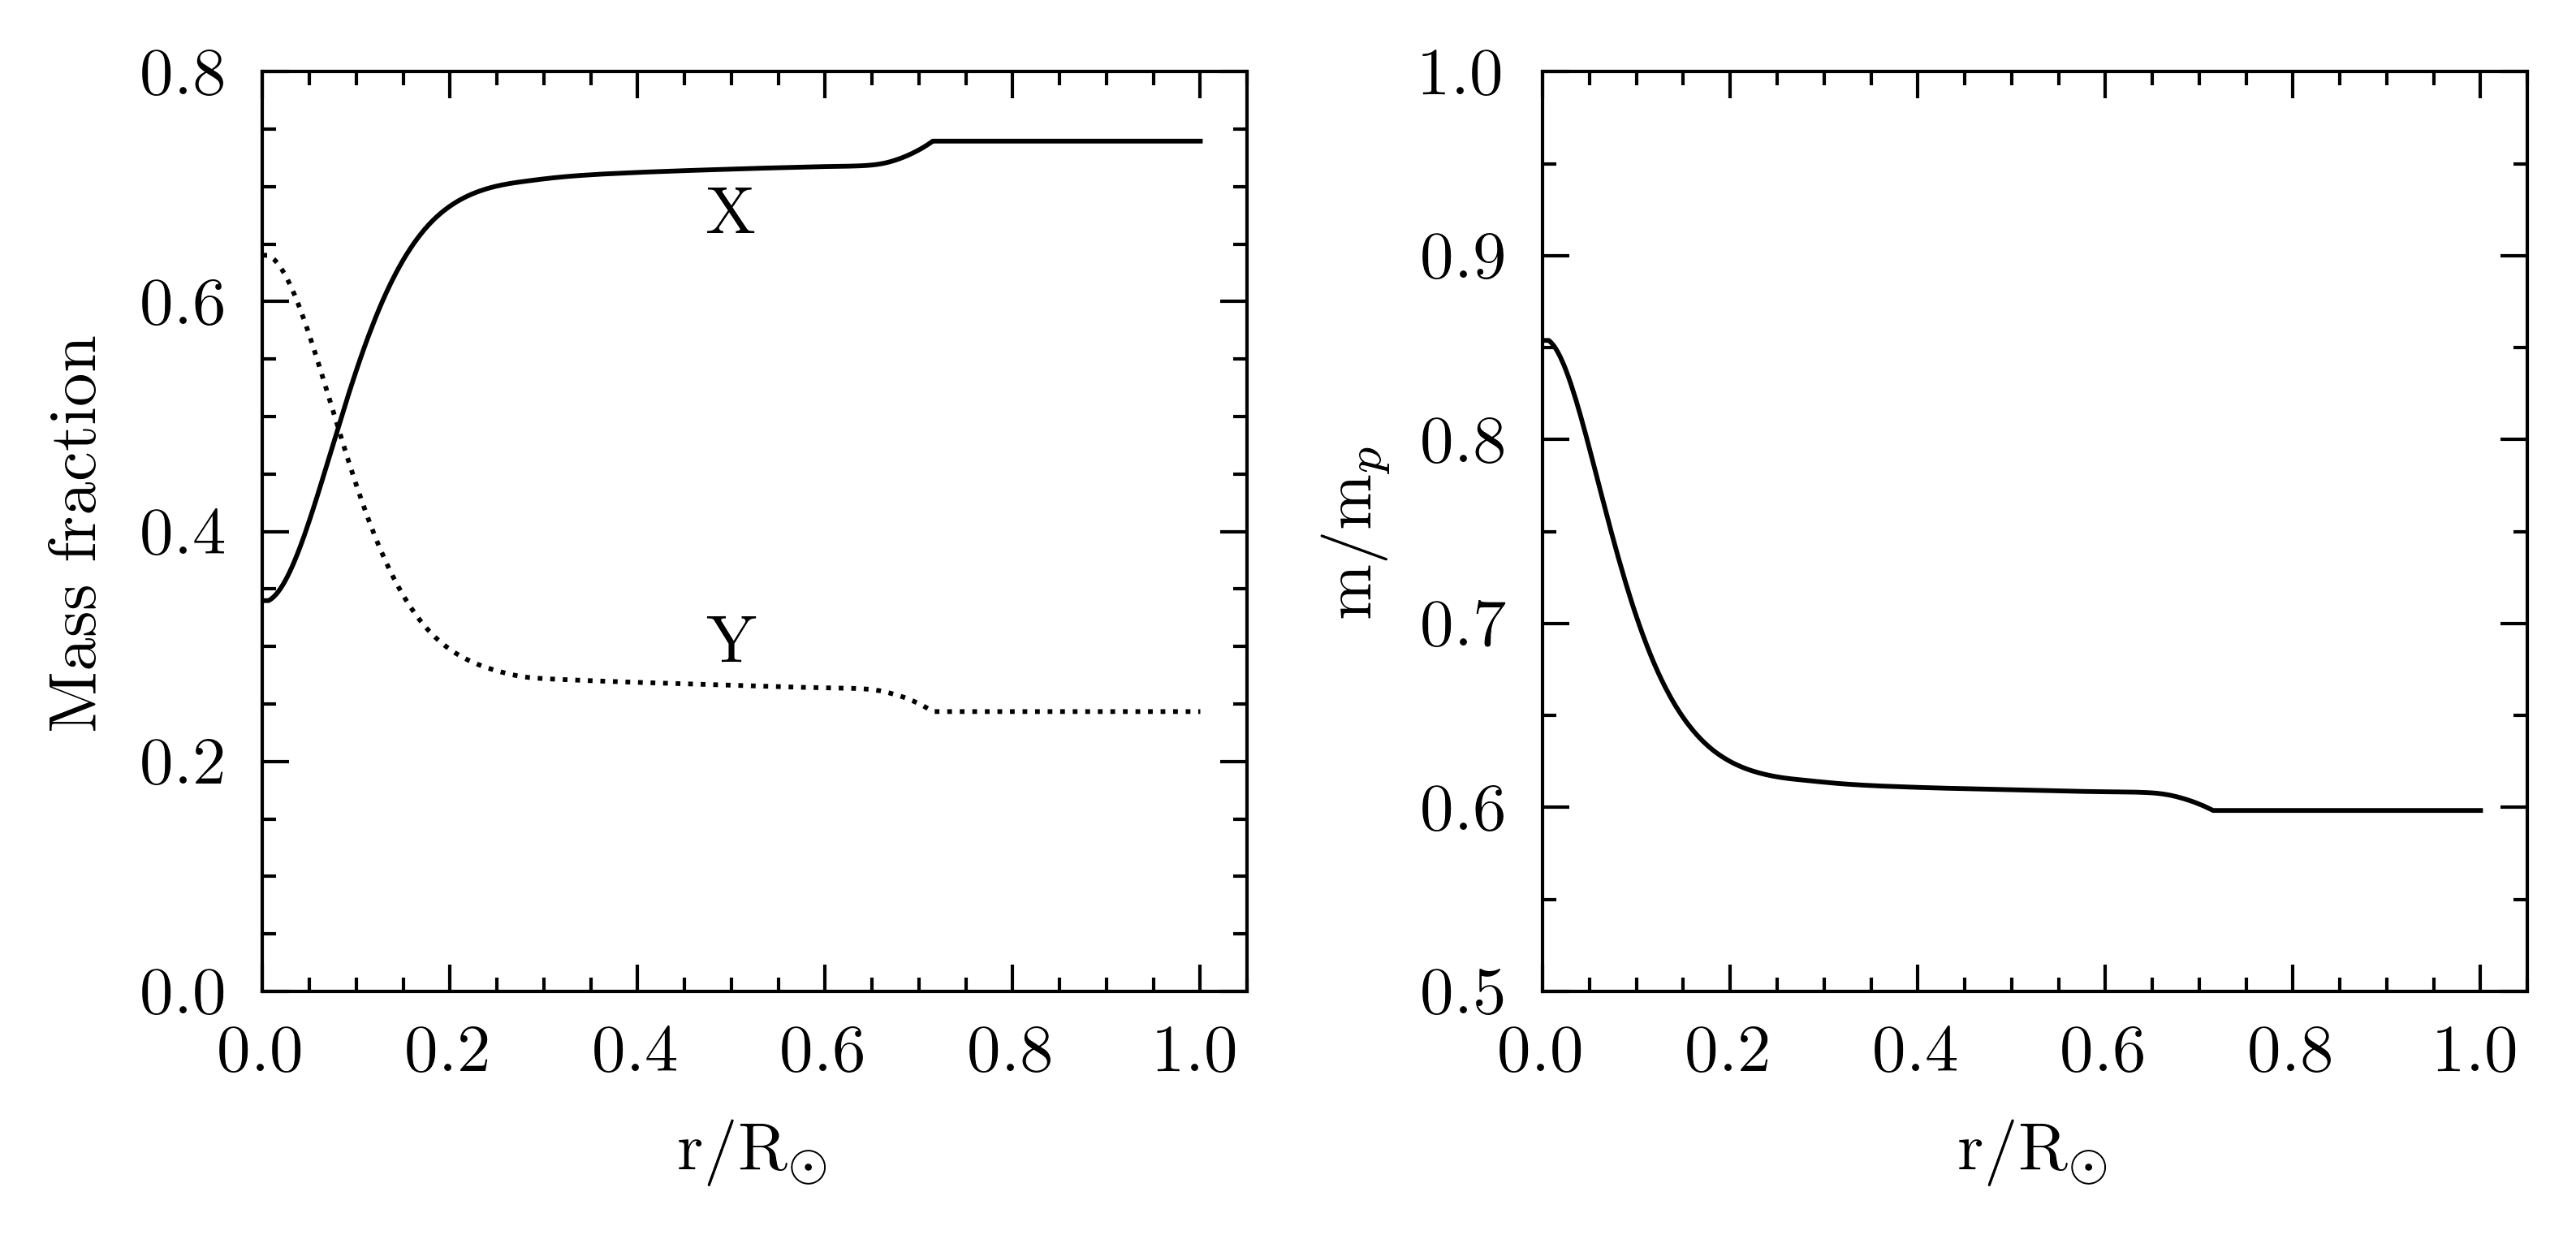

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.3, hspace=0)

# Left Panel: X,Y vs r/Rsun

rMin = 0
rMax = 1.05
yMin = 0
yMax = 0.8

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(rMin,rMax)
ax1.set_xlabel(r'r/R$_\odot$',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(0.20))
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_ylim(yMin,yMax)
ax1.set_ylabel(r'Mass fraction',fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(0.20))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))

ax1.plot(R,X,ls='-',color='black',lw=0.7)
ax1.plot(R,Y,ls=':',color='black',lw=0.7)

# Label by hand because no simple algorithm

ax1.text(0.5,0.7,'X',color='black',ha='center',va='top',fontsize=10)
ax1.text(0.5,0.275,'Y',color='black',ha='center',va='bottom',fontsize=10)
              
# Right Panel: mu vs r/Rsun

rMin = 0
rMax = 1.05
muMin = 0.5
muMax = 1.0

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(rMin,rMax)
ax2.set_xlabel(r'r/R$_\odot$',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(0.20))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylim(muMin,muMax)
ax2.set_ylabel(r'm/m$_p$',fontsize=axisFontSize)
ax2.yaxis.set_major_locator(MultipleLocator(0.10))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))

ax2.plot(R,mu,ls='-',color='black',lw=0.7)
    
# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')